# **Classification of Breast Cancer Molecular Subtypes Using Gene Expression Profiles and Machine Learning Models**

## **Introduction**

Breast cancer is the most frequently diagnosed malignancy and a leading cause of cancer-related mortality among women worldwide. According to the World Health Organization (2020), breast cancer affected more than 2.3 million individuals and caused approximately 685,000 deaths globally. The burden of breast cancer is not only a medical challenge but also a socioeconomic concern, particularly in regions with limited access to diagnostic and treatment resources.

One of the critical complexities in managing breast cancer lies in its heterogeneity. Breast tumors are not uniform; they exhibit significant variations at the morphological, molecular, and clinical levels. Based on molecular features, breast cancer is broadly categorized into distinct subtypes: Luminal A, Luminal B, HER2-enriched, and Basal-like (commonly associated with Triple-Negative Breast Cancer - TNBC). Each subtype is associated with unique biological pathways, treatment responses, and patient prognoses. Accurate subtype classification is essential, as it directly informs the therapeutic approach — from hormone therapy to HER2-targeted treatments to chemotherapy.

Historically, breast cancer subtyping has relied on histopathological analysis and immunohistochemistry (IHC) techniques, which assess the presence of estrogen receptors (ER), progesterone receptors (PR), and HER2 expression. While these methods are widely used in clinical practice, they are subject to human interpretation, inter-observer variability, and often fail to capture the full molecular complexity of tumors.

The advent of high-throughput technologies, particularly RNA sequencing (RNA-Seq), has enabled comprehensive measurement of gene expression levels across thousands of genes simultaneously. These gene expression profiles provide a more nuanced and objective molecular view of tumors, making them a promising tool for precise classification. However, the high dimensionality and complexity of gene expression data pose significant analytical challenges, necessitating the application of advanced computational techniques.

In this context, machine learning (ML) emerges as a powerful approach to uncover meaningful patterns within complex datasets. ML models can learn intricate relationships between gene expression patterns and cancer subtypes, offering potential improvements in classification accuracy and biological interpretability. While various ML techniques have been proposed in cancer genomics, there is still a need for comparative evaluation of classical algorithms like Random Forest and Support Vector Machines (SVM) alongside modern deep learning models such as Convolutional Neural Networks (CNNs).

This study aims to develop, compare, and evaluate multiple machine learning models for the classification of breast cancer subtypes using gene expression data derived from the TCGA-BRCA (The Cancer Genome Atlas – Breast Invasive Carcinoma) dataset. The research further seeks to identify gene signatures that contribute significantly to classification, which may aid future studies in biomarker discovery and clinical applications.


## **Problem Statement**
Accurate classification of breast cancer subtypes is essential for effective treatment planning and prognosis. However, current clinical approaches primarily rely on histopathological assessment and IHC testing, which, although valuable, are limited in their ability to reflect the molecular heterogeneity of tumors. These methods are prone to subjective interpretation and do not fully capture the dynamic and complex gene expression profiles that distinguish cancer subtypes.

RNA-Seq technologies offer a high-resolution molecular snapshot of gene activity within tumors, enabling data-driven classification of subtypes. Nevertheless, the vast scale and complexity of RNA-Seq datasets present a significant challenge in terms of analysis. Traditional statistical techniques are often inadequate for extracting meaningful insights from such high-dimensional data, highlighting the need for robust computational methods.

Although machine learning models have demonstrated potential in the classification of cancer subtypes, there remains a lack of systematic evaluation of both classical and deep learning approaches specifically applied to breast cancer gene expression data. Moreover, limited studies provide interpretable outputs that highlight the biological significance of specific genes contributing to classification outcomes.

Thus, there is a clear need for a study that not only applies and compares multiple machine learning algorithms to breast cancer subtype classification but also integrates interpretability techniques to identify the most relevant gene expression markers. Addressing this gap is critical for advancing precision medicine and supporting oncologists in making informed treatment decisions.

Objectives
General Objective
To develop and evaluate machine learning models for the accurate classification of breast cancer molecular subtypes based on gene expression profiles from the TCGA-BRCA dataset.

Specific Objectives
To acquire and preprocess RNA-Seq gene expression data and clinical subtype labels from the TCGA-BRCA dataset.

To perform exploratory data analysis (EDA) to understand the structure, quality, and distribution of the gene expression data.

To develop classification models using Random Forest, Support Vector Machine (SVM), and Convolutional Neural Network (CNN) algorithms.

To compare model performance based on classification metrics including accuracy, precision, recall, F1-score, and ROC-AUC.

To identify and interpret the most informative genes contributing to subtype classification using model-specific feature importance techniques.

To assess the applicability of the developed models in supporting clinical breast cancer diagnosis and subtype stratification.

## **Significance of the Study**
The accurate classification of breast cancer subtypes plays a pivotal role in determining optimal treatment pathways and predicting patient outcomes. Misclassification can lead to suboptimal therapeutic interventions, unnecessary side effects, and poorer prognoses. Enhancing the accuracy and objectivity of subtype classification through machine learning has the potential to transform clinical practice and contribute to the advancement of precision oncology.

This study is significant for several reasons:

Clinical Relevance: The models developed may complement existing diagnostic protocols by offering data-driven, reproducible, and scalable alternatives for molecular subtyping.

Technological Advancement: The research explores the use of both traditional machine learning and modern deep learning models, offering insights into the comparative strengths of each in handling gene expression data.

Biological Insight: By identifying key genes that influence classification, the study contributes to the understanding of subtype-specific molecular pathways, potentially guiding future biomarker discovery.

Research Contribution: The project addresses an important gap in the literature by systematically evaluating multiple models on the same dataset and emphasizing both predictive performance and biological interpretability.

By leveraging computational methods to enhance breast cancer subtype prediction, this study aims to support more accurate, personalized, and effective cancer care.

## **Dataset**

**Content**

There are 705 breast cancer samples. The dataset contains four different omics data types (1936 features in total).

- cn: copy number variations (n=860)

- mu: mutations (n=249)

- rs: gene expression (n=604)

- pp: protein levels (n=223)

**Acknowledgements**

The dataset was lifted from this analysis by rbabaei https://rbabaei82.github.io/MultiOmics_TCGA-BRCA/Analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
data = pd.read_csv("data/data.csv")
data.head()

,rs_CLEC3A,rs_CPB1,rs_SCGB2A2,rs_SCGB1D2,rs_TFF1,rs_MUCL1,rs_GSTM1,rs_PIP,rs_ADIPOQ,rs_ADH1B,...,pp_p27.pT198,pp_p38.MAPK,pp_p38.pT180.Y182,pp_p53,pp_p62.LCK.ligand,pp_p70S6K,pp_p70S6K.pT389,pp_p90RSK,pp_p90RSK.pT359.S363,vital.status
0,0.892818,6.580103,14.123672,10.606501,13.189237,6.649466,10.520335,10.338490,10.248379,10.229970,...,-0.043330,-0.002598,0.449228,-0.375230,-0.691766,-0.337863,-0.178503,0.011638,-0.207257,0
1,0.000000,3.691311,17.116090,15.517231,9.867616,9.691667,8.179522,7.911723,1.289598,1.818891,...,-0.220764,0.220809,1.035115,-0.074136,0.279067,0.292925,-0.155242,-0.089365,0.267530,0
2,3.748150,4.375255,9.658123,5.326983,12.109539,11.644307,10.517330,5.114925,11.975349,11.911437,...,0.010615,-0.133214,0.344969,-0.351936,0.219910,0.308110,-0.190794,-0.222150,-0.198518,0
3,0.000000,18.235519,18.535480,14.533584,14.078992,8.913760,10.557465,13.304434,8.205059,9.211476,...,0.064070,-0.384008,0.678042,0.096329,-0.266554,-0.079871,-0.463237,0.522998,-0.046902,0
4,0.000000,4.583724,15.711865,12.804521,8.881669,8.430028,12.964607,6.806517,4.294341,5.385714,...,-0.065488,0.209858,0.920408,0.042210,-0.441542,-0.152317,0.511386,-0.096482,0.037473,0


In [6]:
data.shape

(705, 1937)

In [4]:
missing = data.isnull().sum()
missing = missing[missing>0]

if missing.empty:
    print("No missing values in the dataset")
else:
    print("Missing values detected: \n")
    print(missing)

No missing values in the dataset


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Columns: 1937 entries, rs_CLEC3A to vital.status
dtypes: float64(827), int64(1110)
memory usage: 10.4 MB


In [8]:
data.describe()

,rs_CLEC3A,rs_CPB1,rs_SCGB2A2,rs_SCGB1D2,rs_TFF1,rs_MUCL1,rs_GSTM1,rs_PIP,rs_ADIPOQ,rs_ADH1B,...,pp_p27.pT198,pp_p38.MAPK,pp_p38.pT180.Y182,pp_p53,pp_p62.LCK.ligand,pp_p70S6K,pp_p70S6K.pT389,pp_p90RSK,pp_p90RSK.pT359.S363,vital.status
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,...,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,4.547197,6.487979,9.516678,7.351940,8.179439,7.806726,5.677454,8.721931,7.450675,7.747601,...,0.008589,0.004734,0.059332,-0.094355,0.109583,-0.028409,0.048929,-0.002065,0.019180,0.133333
std,4.971708,4.874769,4.758348,4.248440,4.291915,4.325965,4.331351,4.130467,4.244499,4.245585,...,0.254308,0.302194,0.544589,0.579644,0.811079,0.555587,0.377429,0.345646,0.291446,0.340176
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.918200,-1.432959,-1.637550,-3.017238,-2.646594,-2.152630,-0.751501,-1.334300,-1.182336,0.000000
25%,0.000000,2.297602,5.937361,3.842758,5.144707,4.612299,1.436695,5.784499,4.171967,4.688113,...,-0.141888,-0.168875,-0.276563,-0.302937,-0.426244,-0.317636,-0.207172,-0.232004,-0.147140,0.000000
50%,2.379261,6.002963,10.011822,7.701500,9.043774,7.530813,5.866248,9.305378,7.999344,8.277510,...,-0.022655,0.006428,0.084549,-0.067906,-0.005234,-0.067527,-0.039654,-0.010013,0.006341,0.000000
75%,8.025802,9.503384,13.087360,10.493654,11.536532,11.157128,10.132437,11.948430,10.559780,10.785635,...,0.136848,0.183828,0.413358,0.180853,0.573340,0.206411,0.211573,0.212412,0.172476,0.000000
max,17.432087,20.960773,20.978437,19.979807,17.338611,19.132935,14.702210,18.662764,17.355330,17.892925,...,1.051862,1.483391,2.349841,2.069048,3.043258,2.475027,1.664292,1.545965,1.062551,1.000000


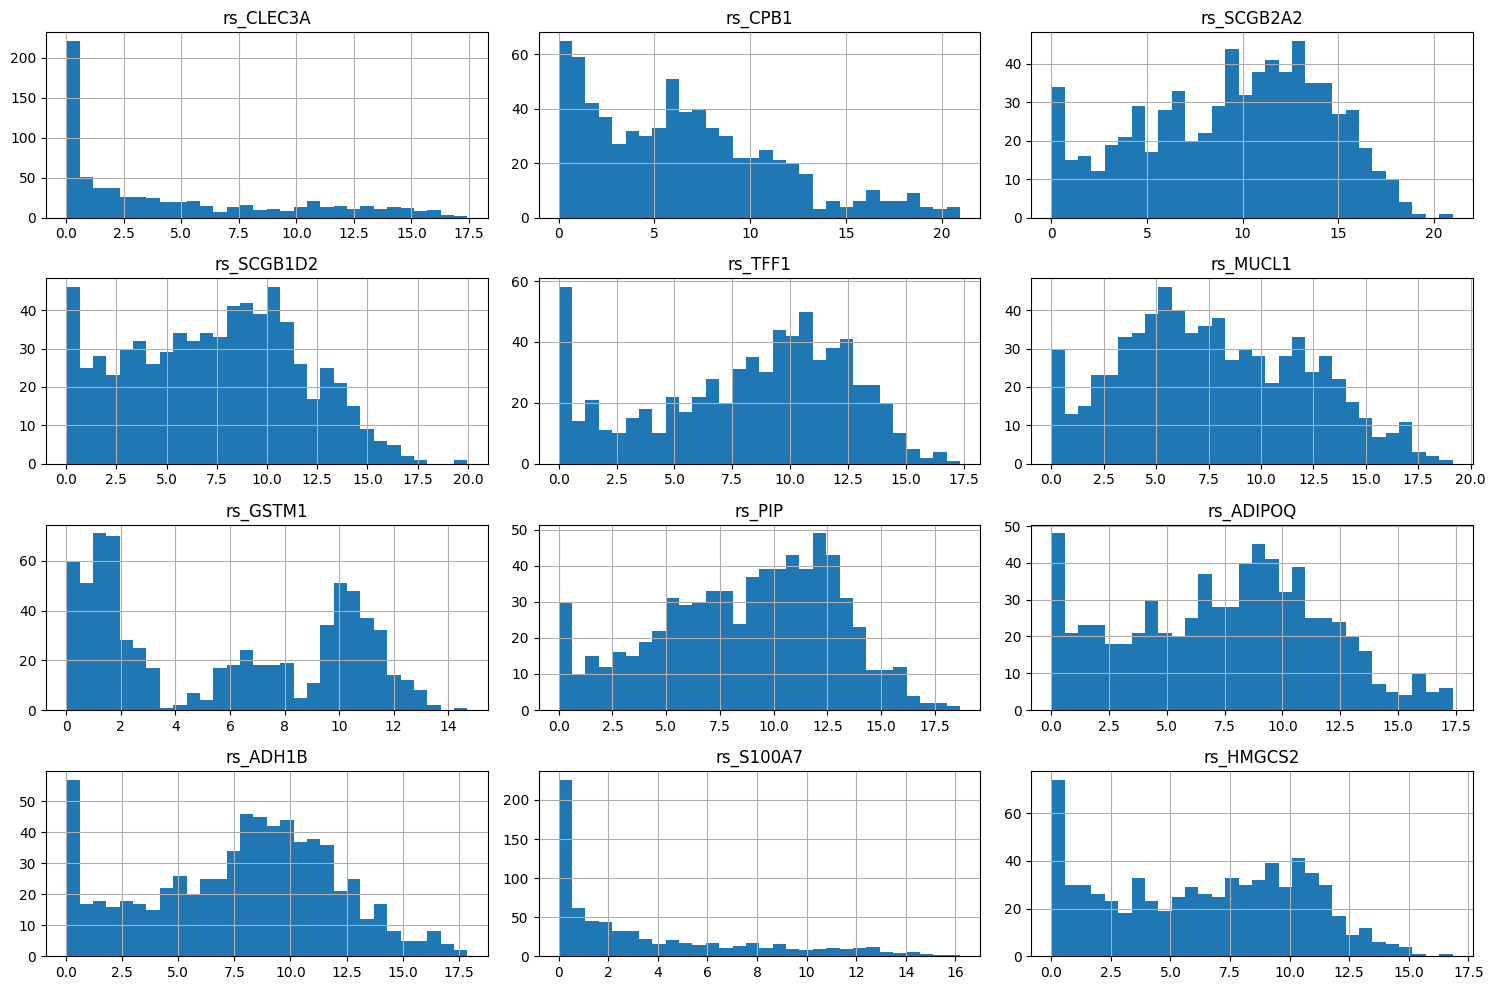

In [10]:
data.iloc[:, :12].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

vital.status
0    611
1     94
Name: count, dtype: int64


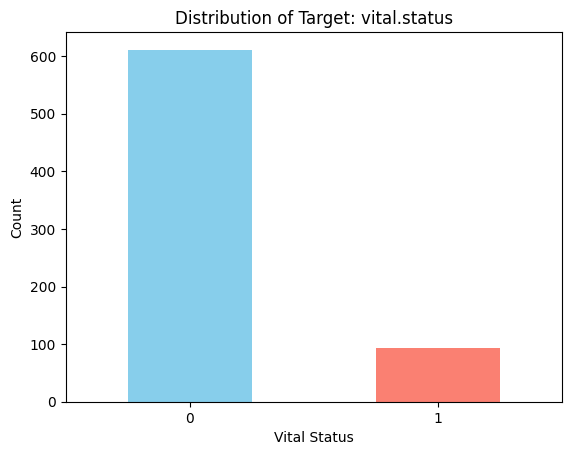

In [11]:
print(data['vital.status'].value_counts())

data['vital.status'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Target: vital.status")
plt.xlabel("Vital Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()
